# Simulación de ecuación no lineal

Vamos a simular la ecuación $$ \frac{d}{dt}u(t) = u^2(t) $$ esto lo podríamos utilizar un integrador como Runge-Kutta de orden 4, pero queremos linealizarlo, ya que al linealizarlo nos permite utilizar métodos con mejor precisión siendo lineales.

Aplicaremos la transformación $$ v(t) = e^{-\frac{1}{u(t)}} $$ esto nos permite transformarlo en la siguiente ecuación dinamica $$ \frac{d}{dt}v(t) = v(t) $$

Por lo tanto si tenemos la transformación $$ v(t) = e^{-\frac{1}{u(t)}} $$ y la destransformación $$ u(t) = -\frac{1}{\ln\left(v(t) \right)} $$, podemos aplicar cualquier situación inicial y avanzar la simulación

Notemos que la solución real de esta ecuación diferencial esta dada por: $$ u(t) = -\frac{1}{t + C} $$ con la condición inicial de $u(t_0) = u_0$ nos da que la solución particular con valores iniciales es $$ u(t) = \frac{u_0}{1 - u_0 \cdot (t - t_0)} $$

In [80]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [81]:
def Transformacion(valor):
    return np.exp(-1 / valor)

def Destransformacion(valor):
    return -1 / np.log(valor)

In [82]:
t0 = -5
tf = 0
u0 = 0.1

cantidadPuntos = 100
t = np.linspace(t0, tf, cantidadPuntos)

In [83]:
# Resolución analitica
uAnalitico = u0 / (1 - u0 * (t - t0))

In [84]:
# Resolución no lineal
uNoLineal = sp.integrate.odeint(lambda y, _: y ** 2, u0, t)

In [85]:
# Resolución linealizada
v0 = Transformacion(u0)
vLinealizado = sp.integrate.odeint(lambda y, _: y, v0, t)
uLinealizado = Destransformacion(vLinealizado)

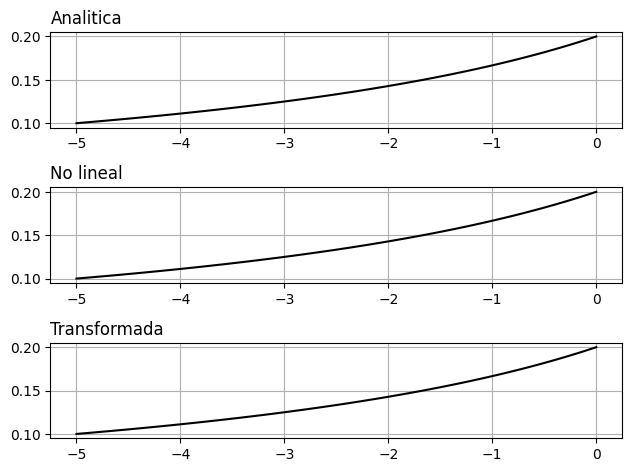

In [86]:
plt.figure()

plt.subplot(3, 1, 1)
plt.plot(t, uAnalitico, 'k-')
plt.grid(True)
plt.title('Analitica', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(3, 1, 2)
plt.plot(t, uNoLineal, 'k-')
plt.grid(True)
plt.title('No lineal', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(3, 1, 3)
plt.plot(t, uLinealizado, 'k-')
plt.grid(True)
plt.title('Transformada', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()